In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas import datetools as dtls
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['weather_hourly_darksky.csv', 'weather_daily_darksky.csv', 'informations_households.csv', 'acorn_details.csv', 'uk_bank_holidays.csv', 'hhblock_dataset', 'daily_dataset', 'halfhourly_dataset']


## Analysing only one block

In [2]:
block2_hh = pd.read_csv("../input/hhblock_dataset/block_2.csv")
block2_daily  = pd.read_csv("../input/daily_dataset/block_2.csv")

In [3]:
block2_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000030,2011-12-07,0.1650,0.180080,0.578,25,0.115534,4.502,0.048
1,MAC000030,2011-12-08,0.1260,0.318979,1.472,48,0.349603,15.311,0.045
2,MAC000030,2011-12-09,0.1075,0.149479,0.408,48,0.096268,7.175,0.046
3,MAC000030,2011-12-10,0.1895,0.443333,1.909,48,0.479837,21.280,0.046
4,MAC000030,2011-12-11,0.2045,0.566500,2.394,48,0.679805,27.192,0.047


In [4]:
block2_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31133 entries, 0 to 31132
Data columns (total 9 columns):
LCLid            31133 non-null object
day              31133 non-null object
energy_median    31132 non-null float64
energy_mean      31132 non-null float64
energy_max       31132 non-null float64
energy_count     31133 non-null int64
energy_std       31036 non-null float64
energy_sum       31132 non-null float64
energy_min       31132 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.1+ MB


In [5]:
len(block2_daily['day'].unique())

815

In [6]:
block2_daily = block2_daily.drop(['LCLid'], axis = 1)

In [7]:
block2_daily.head()

,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,2011-12-07,0.1650,0.180080,0.578,25,0.115534,4.502,0.048
1,2011-12-08,0.1260,0.318979,1.472,48,0.349603,15.311,0.045
2,2011-12-09,0.1075,0.149479,0.408,48,0.096268,7.175,0.046
3,2011-12-10,0.1895,0.443333,1.909,48,0.479837,21.280,0.046
4,2011-12-11,0.2045,0.566500,2.394,48,0.679805,27.192,0.047


In [8]:
block2_daily = block2_daily[['day', 'energy_sum']]

In [9]:
block2_daily.head(12)

,day,energy_sum
0,2011-12-07,4.502
1,2011-12-08,15.311
2,2011-12-09,7.175
3,2011-12-10,21.280
4,2011-12-11,27.192
5,2011-12-12,6.870
6,2011-12-13,6.183
7,2011-12-14,8.180
8,2011-12-15,11.159
9,2011-12-16,6.824


In [10]:
block2_daily = block2_daily.groupby(['day']).sum().reset_index()

In [11]:
block2_daily.head()

,day,energy_sum
0,2011-12-07,4.502
1,2011-12-08,31.018
2,2011-12-09,20.574
3,2011-12-10,38.229
4,2011-12-11,49.578


In [12]:
block2_daily.describe()

,energy_sum
count,815.000000
mean,664.396663
std,268.672639
min,4.502000
25%,490.974500
50%,703.146001
75%,854.801500
max,1239.990001


In [13]:
block2_daily['day'] = pd.to_datetime(block2_daily['day'], format='%Y-%m-%d')

In [14]:
block2_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 2 columns):
day           815 non-null datetime64[ns]
energy_sum    815 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [15]:
df = block2_daily

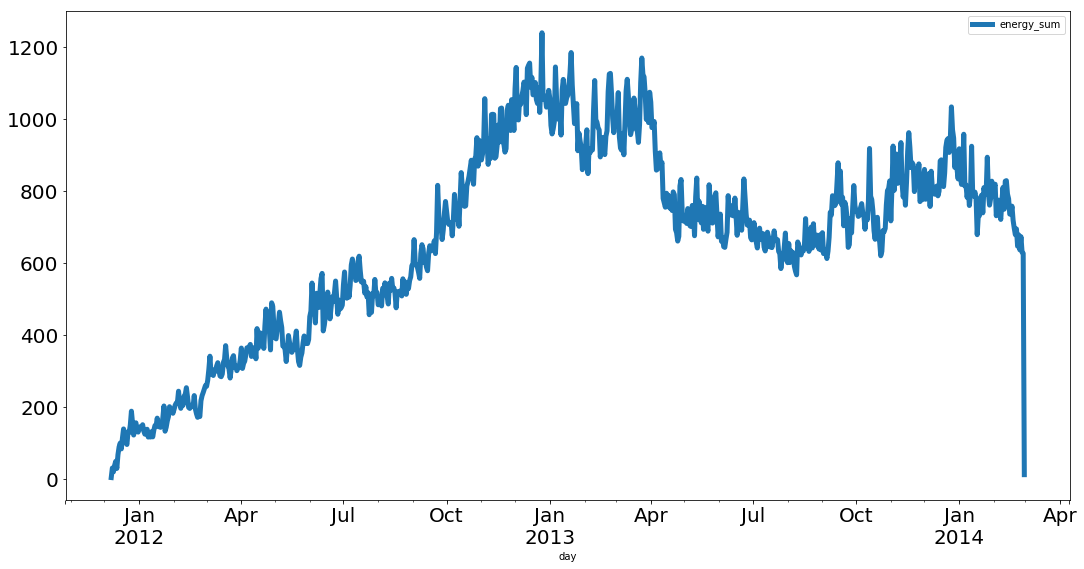

In [16]:
df.plot.line(x = 'day', y = 'energy_sum',  figsize=(18,9), linewidth=5, fontsize=20)
plt.show()

In [17]:
mon = df['day']

In [18]:
temp= pd.DatetimeIndex(mon)

In [19]:
month = pd.Series(temp.month)

In [20]:
to_be_plotted  = df.drop(['day'], axis = 1)

In [21]:
to_be_plotted = to_be_plotted.join(month)

/home/walle/.virtualenvs/pytorch_ts_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


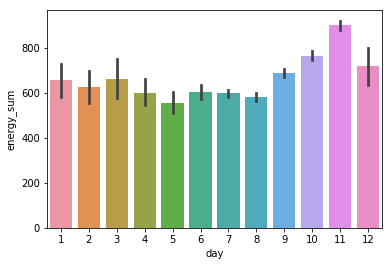

In [22]:
sns.barplot(x = 'day', y = 'energy_sum', data = to_be_plotted)

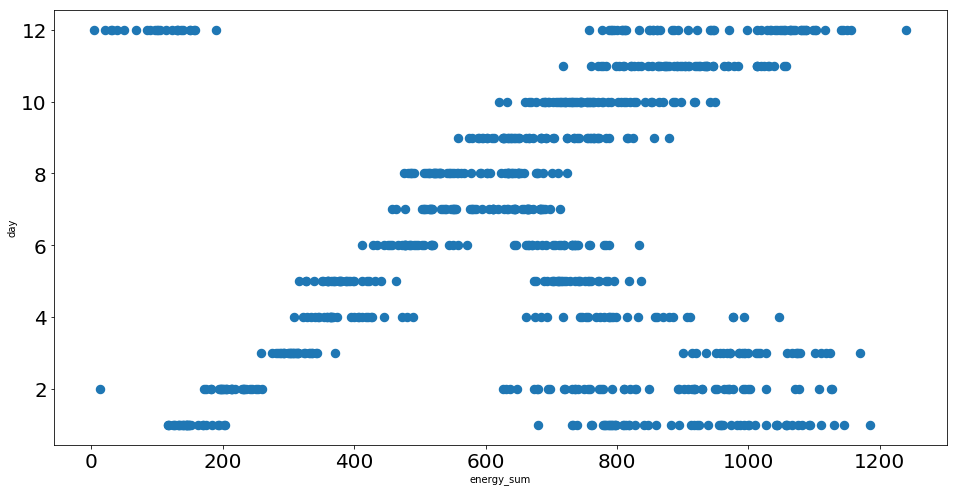

In [23]:
to_be_plotted.plot.scatter(x = 'energy_sum', y = 'day', figsize=(16,8), linewidth=5, fontsize=20)
plt.show()

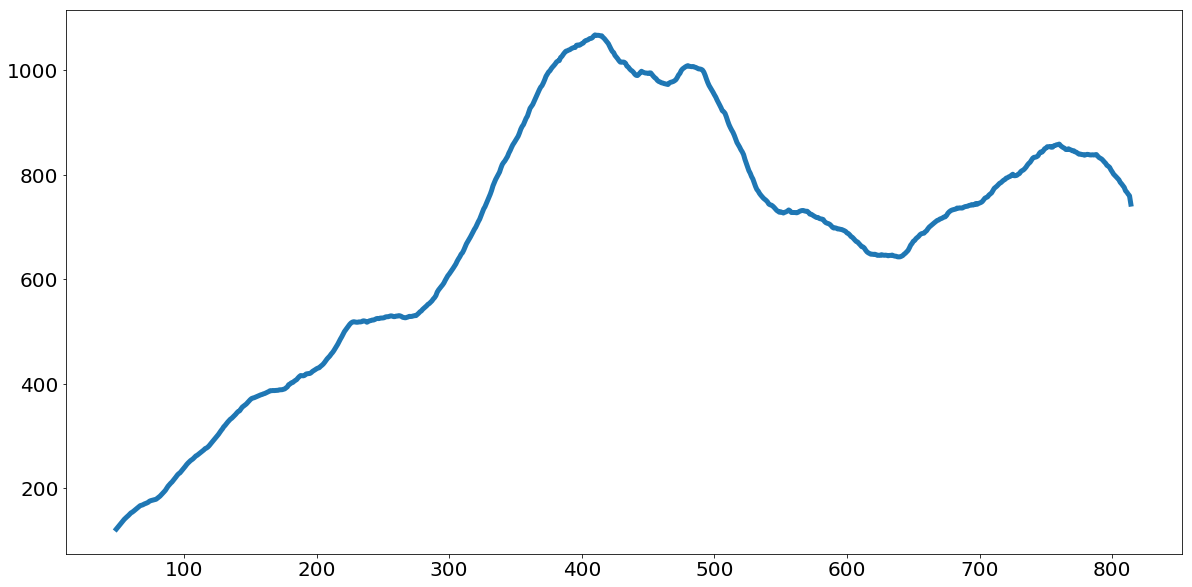

In [24]:
# for trend analysis
df['energy_sum'].rolling(50).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

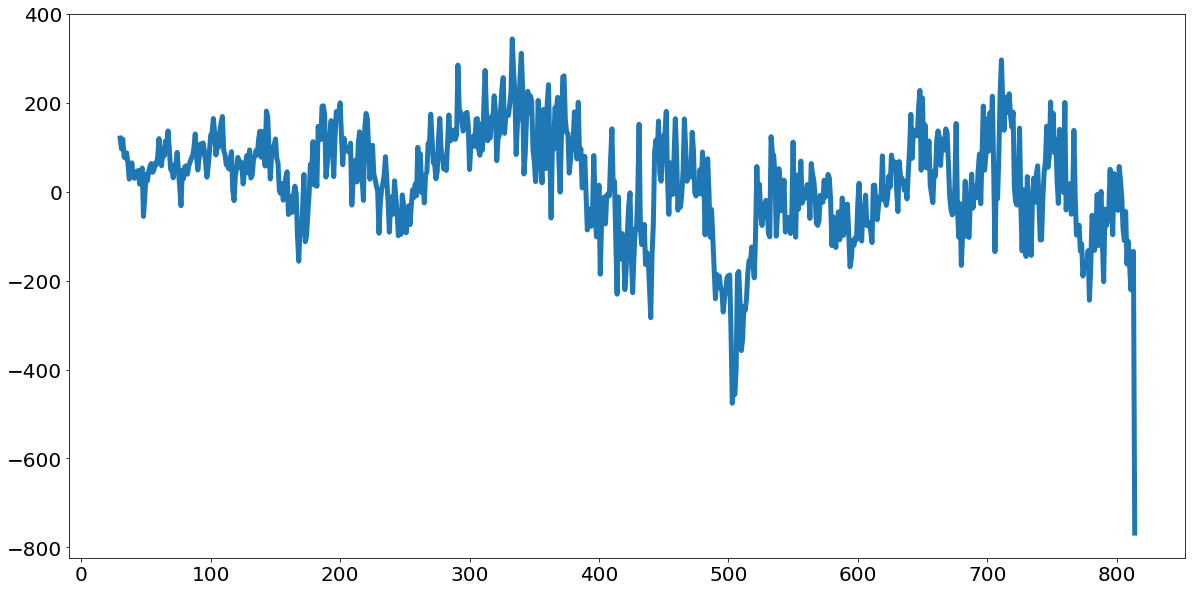

In [25]:
# For seasonal variations
df['energy_sum'].diff(periods=30).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

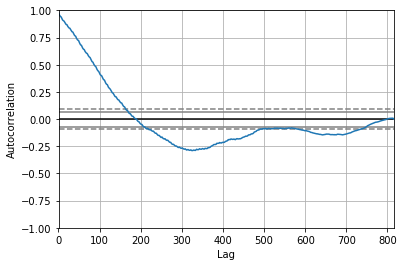

In [26]:
pd.plotting.autocorrelation_plot(df['energy_sum'])
plt.show()

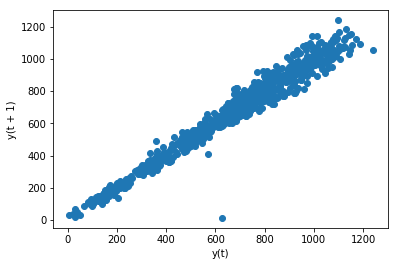

In [27]:
pd.plotting.lag_plot(df['energy_sum'])
plt.show()

In [28]:
df = df.set_index('day')

In [29]:
df.head()

,energy_sum
day,
2011-12-07,4.502
2011-12-08,31.018
2011-12-09,20.574
2011-12-10,38.229
2011-12-11,49.578


In [30]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(df['energy_sum'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

/home/walle/.virtualenvs/pytorch_ts_py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         energy_sum   No. Observations:                  815
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -4318.134
Date:                            Sun, 23 Sep 2018   AIC                           8642.268
Time:                                    14:00:17   BIC                           8656.329
Sample:                                12-07-2011   HQIC                          8647.669
                                     - 02-28-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0507      0.040     -1.261      0.207      -0.130       0.028
ma.S.L12      -0.9995      1.078   

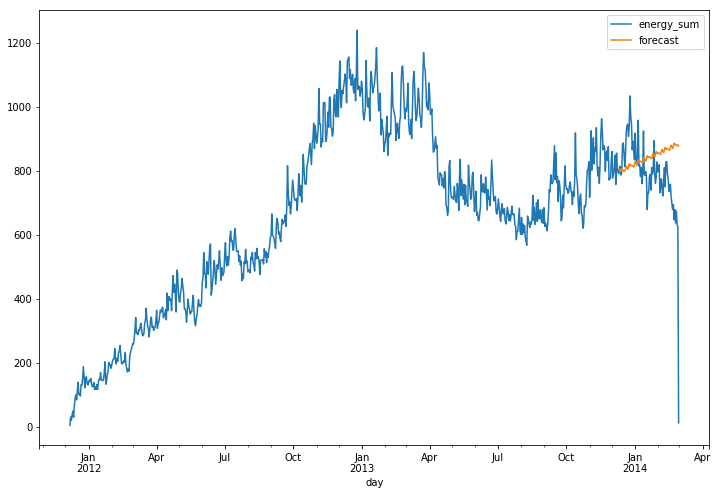

In [31]:
df['forecast'] = results.predict(start = 735, end= 815, dynamic= True)  
df[['energy_sum', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [32]:
def forcasting_future_days(df, no_of_days):
    df_perdict = df.reset_index()
    mon = df_perdict['day']
    mon = mon + pd.DateOffset(days = no_of_days)
    future_dates = mon[-no_of_days -1:]
    df_perdict = df_perdict.set_index('day')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 810, end = 810 + no_of_days, dynamic= True)  
    df_perdict[['energy_sum', 'forecast']].iloc[-no_of_days - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_days:]

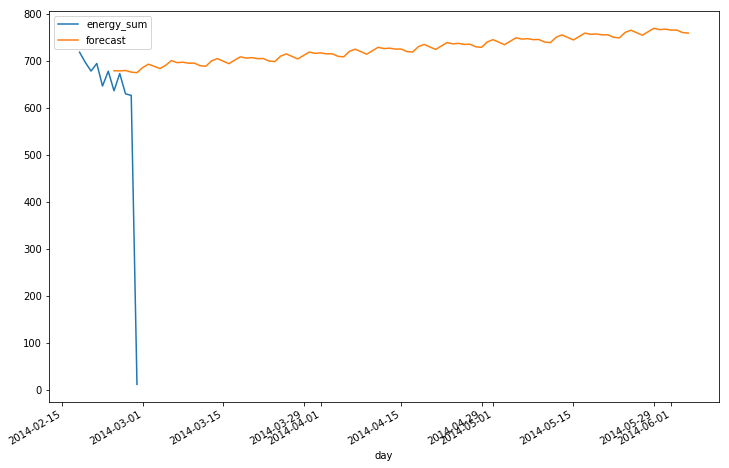

In [33]:
predicted = forcasting_future_days(df,100)


In [34]:
predicted

,energy_sum,forecast
day,,
2014-03-01,NaN,686.523167
2014-03-02,NaN,693.575070
2014-03-03,NaN,689.081257
2014-03-04,NaN,684.348096
2014-03-05,NaN,691.254005
2014-03-06,NaN,701.361701
2014-03-07,NaN,696.881323
2014-03-08,NaN,697.836100
2014-03-09,NaN,695.690908
